# Программирование и компьютерные науки, ФИКЛ ВШЭ

## Домашнее задание №7

## Общая информация

### О задании

Задание состоит из двух разделов:
1. В первом разделе Вы научитесь применять деревья из sklearn для задачи классификации.
2. Во втором разделе Вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn.
 
### Оценивание
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя, если Вы заранее не предупредите об этом преподавателя и не предоставите на то уважительную причину.

В этом задании не требуeтся эффективная реализация кода дерева. Можете не переживать за это, снижать оценку за "долго работающий код" не буду. Главное, чтобы Ваш алгоритм мог показать адекватное качество!


### Формат сдачи
Задание сдается аналогично HW5 через гугл-форму.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Sklearn.

В этой части мы рассмотрим работу решающего дерева из пакета sklearn. Для этого мы сами сгенерируем датасет:

In [ ]:
from sklearn.datasets import make_moons, make_circles, make_classification


dataset = make_moons(noise=0.2, random_state=42)

Посмотрим, как выглядят наши данные:

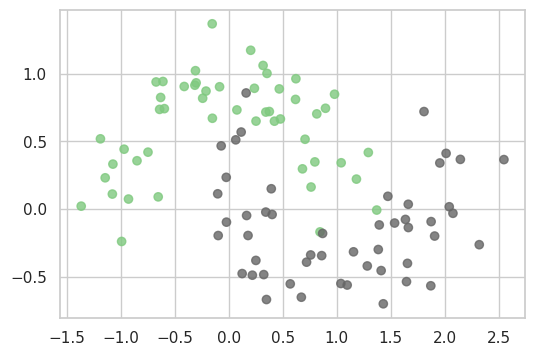

In [ ]:
plt.figure(figsize=(6, 4))
x, y = dataset
plt.scatter(x[:, 0], x[:, 1], c=y, alpha=.8, cmap='Accent')

__Задание 1. (1 балл)__

Давайте теперь обучим дефолтный алгоритм решающего дерева. Для этого разбейте датасет на обучение и тест и обучите модель. Измерьте точность предсказаний при помощи `accuracy`

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ Разбиваем выборку

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ Обучаем модель

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ Ваша точность на обучении и тесте

__Задание 2. (1 балл)__

Попробуйте перебрать несколько параметров для улучшения качества дерева (напр. `max_depth`, `min_samples_leaf`, `criterion`). Cоздайте сетку [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) в которой Вы перебираете все возможные комбинации для гиперпараметров. Не создавайте слишком большую сетку, критериев у Вас может быть 2, а `max_depth` и `min_samples_leaf` сделайте по 5 значений на каждый гиперпараметр.

Найдите лучшую модель и выведите ее точность.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ Ваш гридсерч

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ Точность лучшей модели

Лучше ли модель с дефолтными гиперпараметрами найденной через гридсерч?

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации. В качестве критерия информативности используем индекс Джини:

__Задание 3. (1 балл)__

Реализуйте функцию `gini_index` в которой Вы по данной на вход выборке расчитываете индекс Джини

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ Ваша функция для индекса Джини

__Задание 4. (1 балл)__

Теперь нам нужно реализовать функцию `information_gain`:

![Info](https://tutswiki.com/images/ml/info-gain.png)

Данная функция принимает на вход датафрейм с признаками (`Х`), имя переменной по которой происходит разбиение (`name`), вектор целевой (`у`) переменной и порог по которому нужно проводить разбиение выборки. Вам нужно разбить `Х` и `у` на 2 подвыборки по нужному порогу. После этого Вы рассчитываете индекс Джини по каждой подвыборке (`y_left`, `y_right`) и индекс исходной выборки, и находите взвешенную разницу. После этого Вы должны вернуть: `X_left`, `X_right`, `y_left`, `y_right`, `delta` - признаки и целевые переменные в левой и правой подвыборках и разницу в критериях.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ Ваша функция для Information Gain

__Задание 5. (1 балл)__

Теперь необходимо реализовать функцию для поиска лучшего разбиения - `best_split`. Эта функция принимает на вход только признаки (`X`) и целевую переменную (`y`) и должна вернуть `X_left`, `X_right`, `y_left`, `y_right`, `name`, `threshold` - наилучшее разбиение среди всех возможных, а также название признака и порог, по которому получилось это разбиение.

Можете искать лучшее разбиение в цикле - перебирая все признаки и их значения в качестве аргументов для функции `information_gain` и запоминая то разбиение, у которого `delta` наибольшая.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ Ваша функция для Best Split

__Задание 6. (3 балла).__

Теперь мы готовы собрать все ингридиенты вместе! Давайте все завернем в класс `DecisionTree`. Для решения задачи нам нужно 3 метода - конструктор класса, метод `fit` и метод `predict`. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Также сравните точность Вашего дерева и реализации sklearn.


Самой сложной частью всего ДЗ является реализация метода `fit`. Вам нужно подумать над несколькими моментами:

* Как проверять критерий останова?
* Как хранить предикаты для их дальнейшего использования в `predict`?
* Как правильно строить дерево?
* Как хранить листы?

Если Вы успешно сделали предыдущие пункты, то уже умеете искать оптимальное разбиение, а также запоминать предикат этого разбиения. Теперь необходимо организовать это все вместе. Возможно, Вы придумаете способ запоминать предикаты и листы неявно, способов реализации может быть много.

Также, Вам не обязательно реализовывать гиперпараметры (напр. `max_depth`, `min_samples_leaf`, `criterion`).

In [ ]:
class DecisionTree:

    def __init__(self,):
        pass

    def fit(self, X, y):
        pass

    def predict(self, X):
        pass

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ Сравние точность

__Задание 7. (1 балл).__

Отлично! Разобравшись с одним деревом, мы захотим построить ансамблевую модель! Как правило, одно дерево не используют для решения задачи, а строят над ними ансамбль - либо бэггинг, либо бустинг, либо случайный лес. Сейчас мы попробуем посмотреть разницу в этих алгоритмах. Используем реализации леса и бустинга из sklearn.

Выполните следующие шаги:

1. Загрузите датасет [winequality-red.csv](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv) в датафрейм. Последний столбец - целевая переменная (содержит классы).
2. С помощью cross_val_score с cv=3 оцените качество (accuracy) следующих классификаторов:
 - DecisionTreeClassifier
 - BaggingClassifier со 100 деревьями
 - BaggingClassifier со 100 деревьями; каждое дерево обучается только по половине случайно выбранных признаков (см. параметры метода)
 - RandomForestClassifier со 100 деревьями
 - RandomForestClassifier с 1000 деревьями
 - RandomForestClassifier с 5000 деревьями (код будет работать долго)

Значение получается шумное, но в целом у вас должно получиться, что качество возрастает с каждым следующим алгоритмом. Этот пример демонстрирует, что RandomForest - это более сложный алгоритм, чем бэггинг и бэггинг со случайными подпространствами.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ Ваши точности на лесе

__Задание 8. (1 балл).__

Продолжим работать с набором данных winequality-red.csv. Разделите выборку на обучение и контроль с пропорции 7:3, предварительно перемешав объекты. Теперь будем обучать градиентный бустинг из того же sklearn (GradientBoostingClassifier). Обучите 3 бустинга - с 100, 1000 и 5000 деревьями. Посчитайте accuracy на тестовой выборке для каждого числа деревьев.

Код будет работать долго!

Ответьте на вопрос. Переобучается ли случайный лес и бустинг с увеличением числа деревьев?

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ Ваши точности на бустинге

Вставьте что угодно, описывающее ваши впечатления от этого задания: